In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Test.csv')

In [4]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,NaN,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,NaN,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,NaN,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,NaN,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,NaN,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


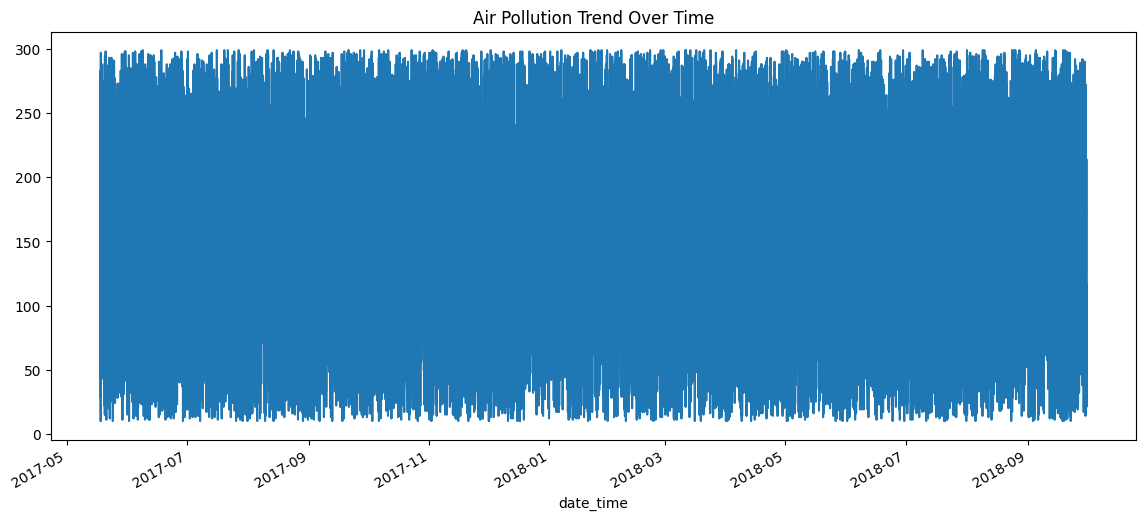

In [5]:
# Convert date column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Set as index (for time-series)
df.set_index('date_time', inplace=True)

# Plot trend
plt.figure(figsize=(14, 6))
df['air_pollution_index'].plot(title='Air Pollution Trend Over Time')
plt.show()

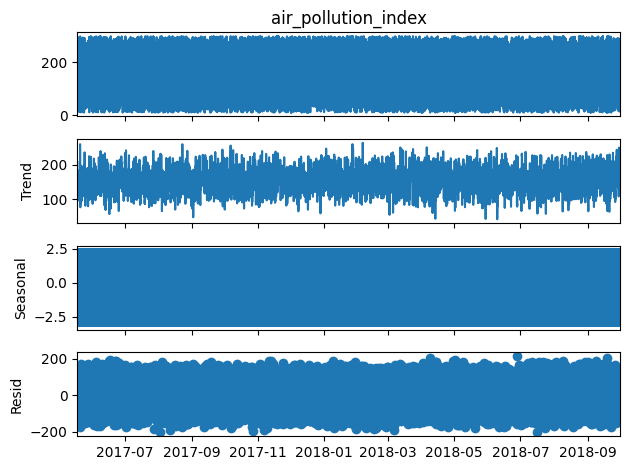

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['air_pollution_index'], model='additive', period=7)
result.plot()
plt.show()


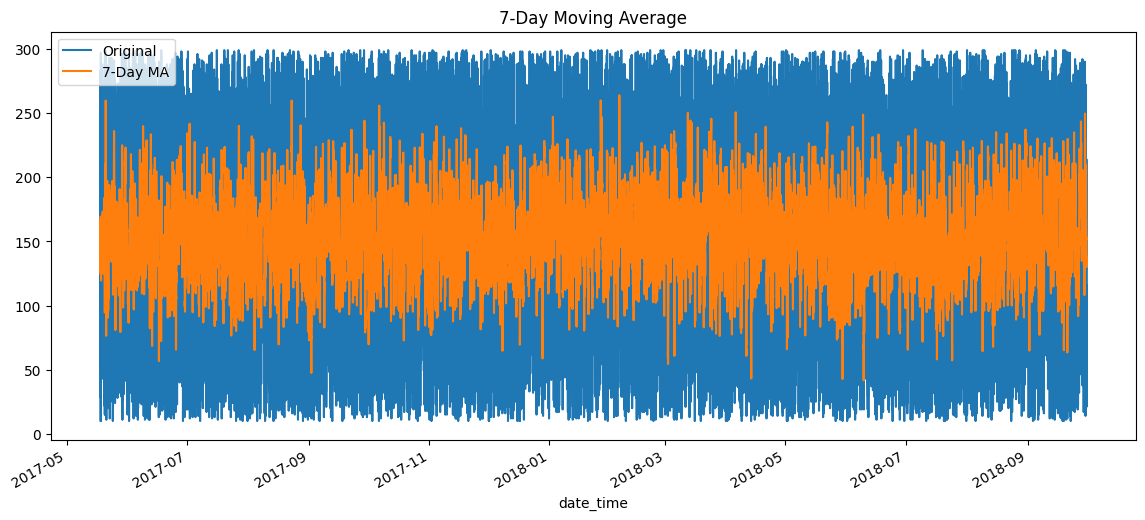

In [7]:
# 7-day moving average
df['7_day_avg'] = df['air_pollution_index'].rolling(window=7).mean()

# Plot
plt.figure(figsize=(14,6))
df['air_pollution_index'].plot(label='Original')
df['7_day_avg'].plot(label='7-Day MA')
plt.legend()
plt.title('7-Day Moving Average')
plt.show()

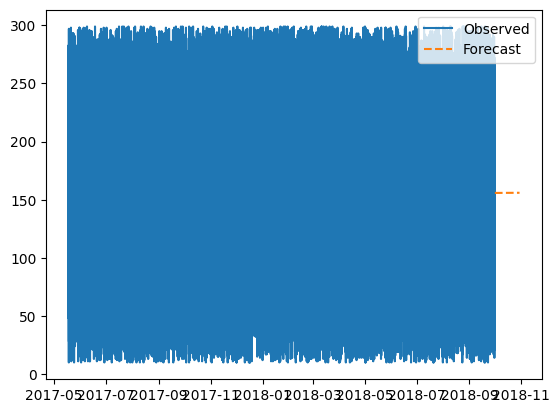

In [8]:
from sklearn.linear_model import LinearRegression

# Prepare time index
df['days'] = (df.index - df.index.min()).days
X = df[['days']]
y = df['air_pollution_index']

model = LinearRegression()
model.fit(X, y)

# Predict future (e.g., next 30 days)
future_days = pd.DataFrame({'days': range(X['days'].max()+1, X['days'].max()+31)})
future_preds = model.predict(future_days)

# Plot forecast
plt.plot(df.index, y, label='Observed')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), future_preds, label='Forecast', linestyle='--')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Predict on known data
preds = model.predict(X)
mae = mean_absolute_error(y, preds)
mape = mean_absolute_percentage_error(y, preds)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")


MAE: 72.18
MAPE: 112.89%


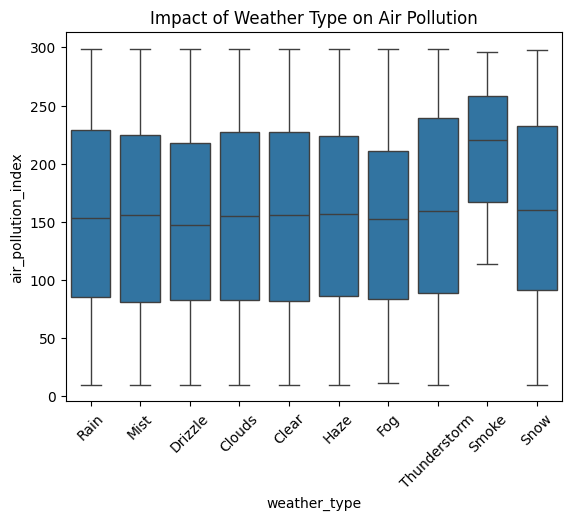

In [11]:
# Boxplot: air pollution by weather type
sns.boxplot(x='weather_type', y='air_pollution_index', data=df)
plt.xticks(rotation=45)
plt.title('Impact of Weather Type on Air Pollution')
plt.show()



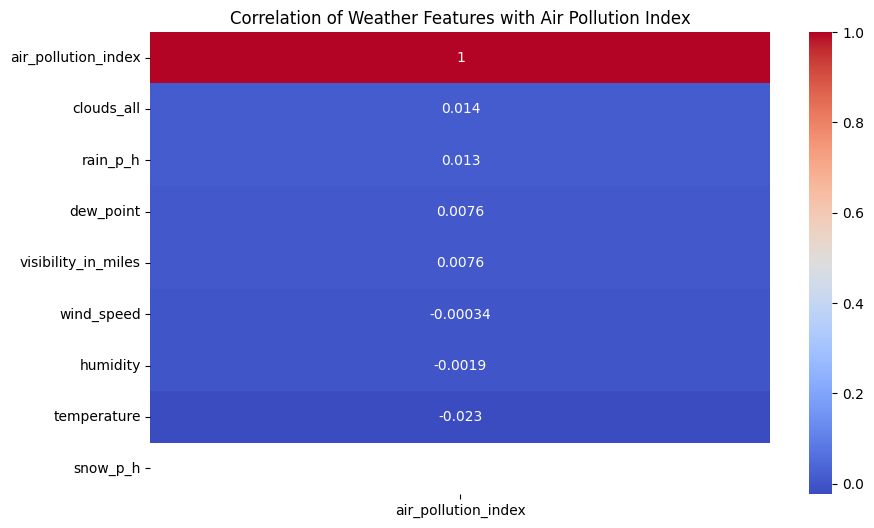

In [12]:
weather_features = ['humidity', 'wind_speed', 'visibility_in_miles',
                    'dew_point', 'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all']

# Correlation matrix
corr = df[weather_features + ['air_pollution_index']].corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr[['air_pollution_index']].sort_values(by='air_pollution_index', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Weather Features with Air Pollution Index')
plt.show()


In [13]:
df = df.copy()
df['days_since_start'] = (df.index - df.index.min()).days


In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['days_since_start']]
y = df['air_pollution_index']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [15]:
# Create future days
future_days = pd.DataFrame({'days_since_start': np.arange(X['days_since_start'].max()+1, X['days_since_start'].max()+31)})

# Predict future values
future_preds = model.predict(future_days)

# Create datetime index for next 30 days
future_dates = pd.date_range(df.index.max() + pd.Timedelta(days=1), periods=30)
future_df = pd.DataFrame({
    'date': future_dates,
    'predicted_air_pollution_index': future_preds
})
future_df.set_index('date', inplace=True)


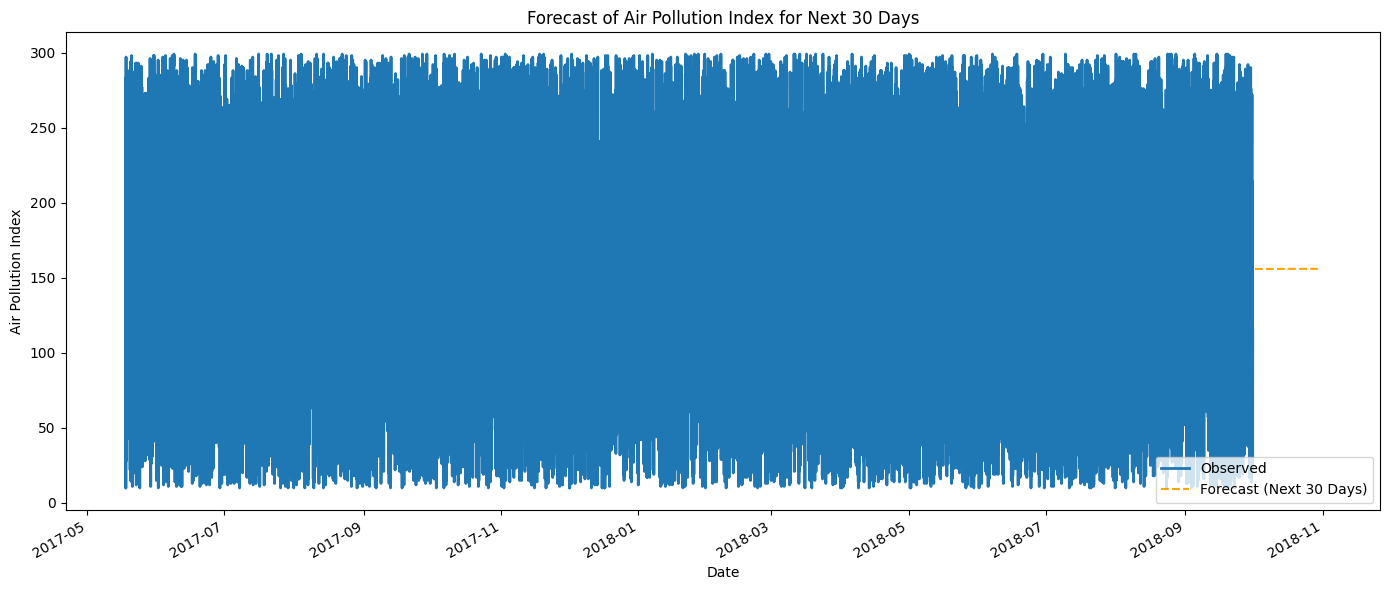

In [16]:
plt.figure(figsize=(14, 6))
df['air_pollution_index'].plot(label='Observed', linewidth=2)
future_df['predicted_air_pollution_index'].plot(label='Forecast (Next 30 Days)', linestyle='--', color='orange')
plt.title('Forecast of Air Pollution Index for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Air Pollution Index')
plt.legend()
plt.tight_layout()
plt.show()
